In [ ]:
np.random.seed(13)

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

In [4]:
df = pd.read_csv('../../datasets/model_frame.csv')

# Cleaning

In [5]:
df['adopted'] = (df['outcome_type'] == 'Adoption').map({True: 1, False:0})

df.drop(columns=['outcome_type'], inplace=True)
df['month_in'] = df['month_in'].astype(str)

# One Hot Encoding Data Frame

The goal of one hot encoding is to ensure that we can maintain the consitency of encoding our variables when we are using our app. We do not drop first because our models are not inherently concerned with interpretability, so there is no need. It is also easier for us to split our data when we do it this way.

In [6]:
# get our numeric columns
numeric = df.select_dtypes(exclude=object)

# get our categorical columns
categorical = df.select_dtypes([object])

# preserve the names of our categorical data
categorical_fnames = categorical.dtypes.keys() # preserve the names

# make sure you are importing one hot encoder, or this function will not work
enc = OneHotEncoder(sparse=False)

# categorical is now an array of arrays 
categorical = enc.fit_transform(categorical) 

dummy_cat_names = enc.get_feature_names(categorical_fnames)

categorical_df = pd.DataFrame(categorical, columns=dummy_cat_names)

df = pd.concat([numeric, categorical_df], axis=1)

In [7]:
pickle.dump(enc, open('../../app/model/input_encoder.pkl','wb'))

# Strays


Strays are our most common class, and we use Gradient boosting because it consistently performs better than other models with minimal hyper param tuning. 

In [8]:
model_df = df[df['intake_type_Stray'] == 1]
model_df.reset_index(inplace=True, drop=True)

## Baseline

In [9]:
print(model_df['adopted'].value_counts(normalize=True))

0    0.550385
1    0.449615
Name: adopted, dtype: float64


## Model

In [10]:
features = (model_df.drop(columns = ['adopted']).columns)
X = model_df[features]
y = model_df['adopted']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

In [12]:
pipe_params = [
  ('scaler', StandardScaler()),
  ('gbc', GradientBoostingClassifier(random_state=13))
]
stray_pipe = Pipeline(pipe_params)
stray_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbc', GradientBoostingClassifier(random_state=13))])

### Scores

In [13]:
print('Training Score: ', stray_pipe.score(X_train, y_train))
print('Testing Score: ', stray_pipe.score(X_test, y_test))

Training Score:  0.8328847084442293
Testing Score:  0.8286077212720592


              precision    recall  f1-score   support

           0       0.92      0.76      0.83     12132
           1       0.75      0.92      0.83      9911

    accuracy                           0.83     22043
   macro avg       0.84      0.84      0.83     22043
weighted avg       0.84      0.83      0.83     22043



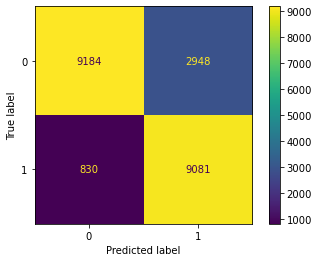

In [14]:
plot_confusion_matrix(stray_pipe, X_test, y_test);
print(classification_report(y_test, stray_pipe.predict(X_test)))

### Pickling

In [15]:
pickle.dump(stray_pipe, open('../../app/model/stray_pipe.pkl','wb'))

# Owner Surrenders

Nothing too special here.

In [16]:
model_df = df[df['intake_type_Owner Surrender'] == 1]
model_df.reset_index(inplace=True, drop=True)

## Baseline

In [17]:
print(model_df['adopted'].value_counts(normalize=True))

1    0.633628
0    0.366372
Name: adopted, dtype: float64


## Model

In [18]:
features = (model_df.drop(columns = ['adopted']).columns)
X = model_df[features]
y = model_df['adopted']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

pipe_params = [
               ('scaler', StandardScaler()),
               ('gbc', GradientBoostingClassifier(random_state=13))
]
surrender_pipe = Pipeline(pipe_params)
surrender_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbc', GradientBoostingClassifier(random_state=13))])

### Scores

In [19]:
print('Training Score: ', surrender_pipe.score(X_train, y_train))
print('Testing Score: ', surrender_pipe.score(X_test, y_test))

Training Score:  0.7386721208307111
Testing Score:  0.733364794714488


              precision    recall  f1-score   support

           0       0.79      0.37      0.51      2329
           1       0.72      0.94      0.82      4028

    accuracy                           0.73      6357
   macro avg       0.75      0.66      0.66      6357
weighted avg       0.75      0.73      0.70      6357



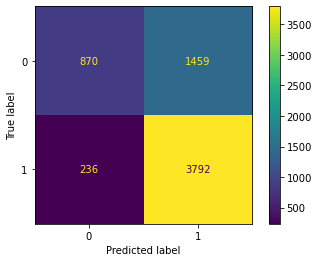

In [20]:
plot_confusion_matrix(surrender_pipe, X_test, y_test);
print(classification_report(y_test, surrender_pipe.predict(X_test)))

### Pickling


In [22]:
pickle.dump(surrender_pipe, open('../../app/model/ownersurrender_pipe.pkl','wb'))

# Public Assist

In [23]:
model_df = df[df['intake_type_Public Assist'] == 1]
model_df.reset_index(inplace=True, drop=True)

## Baseline

In [24]:
print(model_df['adopted'].value_counts(normalize=True))

0    0.85573
1    0.14427
Name: adopted, dtype: float64


## Model

In [25]:
features = (model_df.drop(columns = ['adopted']).columns)
X = model_df[features]
y = model_df['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

pipe_params = [
               ('scaler', StandardScaler()),
               ('gbc', GradientBoostingClassifier(random_state=13))
]
passist_pipe = Pipeline(pipe_params)
passist_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbc', GradientBoostingClassifier(random_state=13))])

### Scores

In [26]:
print('Training Score: ', passist_pipe.score(X_train, y_train))
print('Testing Score: ', passist_pipe.score(X_test, y_test))

Training Score:  0.9071599862966769
Testing Score:  0.9003083247687564


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1665
           1       0.72      0.50      0.59       281

    accuracy                           0.90      1946
   macro avg       0.82      0.73      0.77      1946
weighted avg       0.89      0.90      0.89      1946



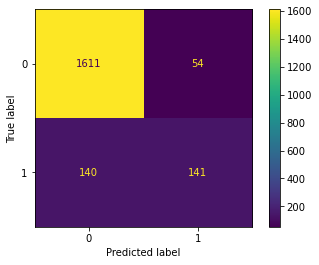

In [27]:
plot_confusion_matrix(passist_pipe, X_test, y_test);
print(classification_report(y_test, passist_pipe.predict(X_test)))

### Pickling

In [28]:
pickle.dump(passist_pipe, open('../../app/model/pubassist_pipe.pkl','wb'))

# Euthanasia Requests

Euthanasia Requests are another troublesome quality in our data. Since we are predicting adoptions, we may be outside the general scope of the goal of the Animal Shelter when they deal with Euthanasia Requests. Bootstrapping and tuning did not improve our model in any significant way.

In [29]:
model_df = df[df['intake_type_Euthanasia Request'] == 1]
model_df.reset_index(inplace=True, drop=True)

## Baseline

In [30]:
print(model_df['adopted'].value_counts(normalize=True))

0    0.945525
1    0.054475
Name: adopted, dtype: float64


## Model

In [31]:
features = (model_df.drop(columns = ['adopted']).columns)
X = model_df[features]
y = model_df['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

pipe_params = [
               ('scaler', StandardScaler()),
               ('gbc', GradientBoostingClassifier(random_state=13))
]
euth_req_pipe = Pipeline(pipe_params)
euth_req_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbc', GradientBoostingClassifier(random_state=13))])

### Scores

In [32]:
print('Training Score: ', euth_req_pipe.score(X_train, y_train))
print('Testing Score: ', euth_req_pipe.score(X_test, y_test))

Training Score:  1.0
Testing Score:  0.9538461538461539


              precision    recall  f1-score   support

           0       0.95      1.00      0.98        61
           1       1.00      0.25      0.40         4

    accuracy                           0.95        65
   macro avg       0.98      0.62      0.69        65
weighted avg       0.96      0.95      0.94        65



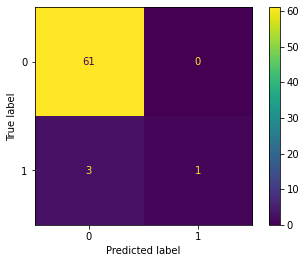

In [33]:
plot_confusion_matrix(euth_req_pipe, X_test, y_test);
print(classification_report(y_test, euth_req_pipe.predict(X_test)))

### Pickling

In [34]:
pickle.dump(euth_req_pipe, open('../../app/model/euth_pipe.pkl','wb'))

# Wildlife

The wildlife model is having a difficult time figuring out when an animal gets adopted, we simply have too few positive cases of Wildlife getting adopted to produce meaningful results. Bagging (Bootstrapping) did not yield better results, and actually fit our model too perfectly to our training set. Based on the amount of information, and the likelihood of a wild animal getting adopted, we probably would need to get more data then we currently have to determine what goes into wildlife adoptions.

Also since we changed our problem to predicting adoptions, we may have inadvertently changed the scope of what the Animal Shelter does with wildlife. It may be too naive of us to assume that the goal of the Animal Shelter is to get their wildlife adopted.

In [35]:
model_df = df[df['intake_type_Wildlife'] == 1]
model_df.reset_index(inplace=True, drop=True)

## Baseline

In [36]:
print(model_df['adopted'].value_counts(normalize=True))

0    0.998618
1    0.001382
Name: adopted, dtype: float64


## Model

In [37]:
features = (model_df.drop(columns = ['adopted']).columns)
X = model_df[features]
y = model_df['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

pipe_params = [
               ('scaler', StandardScaler()),
               ('gbc', GradientBoostingClassifier(random_state=13, learning_rate=.01))
]
wildlife_pipe = Pipeline(pipe_params)
wildlife_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.01,
                                            random_state=13))])

### Scores

In [38]:
print('Training Score: ', wildlife_pipe.score(X_train, y_train))
print('Testing Score: ', wildlife_pipe.score(X_test, y_test))

Training Score:  1.0
Testing Score:  0.9984214680347278


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1265
           1       0.00      0.00      0.00         2

    accuracy                           1.00      1267
   macro avg       0.50      0.50      0.50      1267
weighted avg       1.00      1.00      1.00      1267



/Users/evanhoefling/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/evanhoefling/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/evanhoefling/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

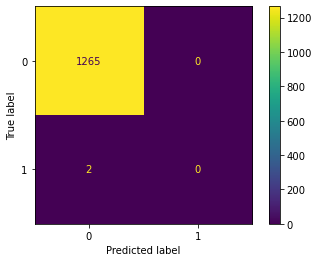

In [39]:
plot_confusion_matrix(wildlife_pipe, X_test, y_test);
print(classification_report(y_test, wildlife_pipe.predict(X_test)))

### Pickling

In [40]:
pickle.dump(euth_req_pipe, open('../../app/model/wlife_pipe.pkl','wb'))

# Abandoned

After tuning for hyper parameters we were not necessarily able to improve accuracy, but we were able to reduce overfitting

In [41]:
model_df = df[df['intake_type_Abandoned'] == 1]
model_df.reset_index(inplace=True, drop=True)

## Baseline

In [42]:
print(model_df['adopted'].value_counts(normalize=True))

0    0.504525
1    0.495475
Name: adopted, dtype: float64


## Model

In [43]:
features = (model_df.drop(columns = ['adopted']).columns)
X = model_df[features]
y = model_df['adopted']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y)

pipe_params = [
               ('scaler', StandardScaler()),
               ('gbc', GradientBoostingClassifier(max_features=1000,learning_rate=.001,random_state=13))
]
abandoned_pipe = Pipeline(pipe_params)
abandoned_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gbc',
                 GradientBoostingClassifier(learning_rate=0.001,
                                            max_features=1000,
                                            random_state=13))])

### Scores

In [44]:
print('Training Score: ', abandoned_pipe.score(X_train, y_train))
print('Testing Score: ', abandoned_pipe.score(X_test, y_test))

Training Score:  0.8700906344410876
Testing Score:  0.8288288288288288


              precision    recall  f1-score   support

           0       0.95      0.70      0.80        56
           1       0.76      0.96      0.85        55

    accuracy                           0.83       111
   macro avg       0.85      0.83      0.83       111
weighted avg       0.86      0.83      0.83       111



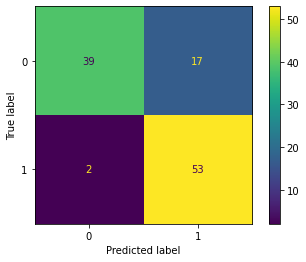

In [45]:
plot_confusion_matrix(abandoned_pipe, X_test, y_test);
print(classification_report(y_test, abandoned_pipe.predict(X_test)))

### Pickling

In [46]:
pickle.dump(euth_req_pipe, open('../../app/model/abandoned_pipe.pkl','wb'))

# Pickle Dump for Streamlit App

In [47]:
pkl_df = pd.read_csv('../../datasets/model_frame.csv')

In [50]:
pickle.dump(pkl_df['color'].unique(), open('../../app/model/animal_color_list.pkl','wb'))
pickle.dump(pkl_df['animal_type'].unique(), open('../../app/model/animal_type_list.pkl','wb'))
pickle.dump(pkl_df['breed'].unique(), open('../../app/model/animal_breed_list.pkl','wb'))
pickle.dump(pkl_df['intake_condition'].unique(), open('../../app/model/intake_cond_list.pkl','wb'))